# SECTION I - CODING TEST


## Part 1 - Numpy and ML Basics

In [0]:
import numpy as np

### Q Samples and Features
Given a dataset in the form of a numpy array where axis = 0 indexes samples and axis = 1 indexes features. Write a function that returns number of samples in dataset and number of samples in each feature.

In [0]:
def samps_feats(x):
    """
    Inputs:
        x: numpy array of shape (samples, features)
    Outputs:
        s: int, number of samples in x
        f: int, number of features in x
    """
    # YOUR CODE HERE
    s=x.shape[0]
    f=x.shape[1]
    return s, f

  

In [448]:
"""Testing"""
assert samps_feats(np.arange(12).reshape(4, 3)) == (4, 3)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


### Q Third Column

In [0]:
def thirdColumn(a):
  '''
  Given a two dimensional array a of shape (m, n) m>=3, n>=3. Return the third column of a.
  
  Input: 
      a: Numpy array of shape (m, n)
  Output:
      c:  Numpy array of shape (m,)
     
  '''
  # YOUR CODE HERE
  l=[]
  l = a
  return l[:,2]

In [450]:
"""Tests"""
a = np.arange(9).reshape(3, 3)
assert np.all(thirdColumn(a) == np.array([2, 5, 8]))
print('Test passed', '\U0001F44D')



Test passed 👍


### Q Precision
Given a confusion matrix $cm$ of shape ($N_y$, $N_y$) and a class $cls$ where $0<=cls<=N_y-1$. 
Compute and return the precision for that class from the confusion matrix 



In [0]:
def precision(cm, cls):
    """
    Inputs:
        cm : np array of shape (Ny, Ny)
        cls : int, 0<=cls<=Ny-1
    Outputs:
        prec : float, precision of class cls in cm
    """
    # YOUR CODE HERE
    
    col = cm[:, cls]
    prec= cm[cls,cls] / col.sum()
    return prec




In [452]:
"""Test for precision"""
cm = np.arange(9).reshape(3, 3)
assert np.isclose(precision(cm, 2), 0.5333333333, atol = 0.001) 
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


### Q Sigmoid derivative
Given an input $z$. Write a function that returns the derivative of the sigmoid($\sigma$) function.<br>
$\sigma(z) = \frac{1}{1+e^z}$

In [0]:
def sigmoid_derivative(z):
    """
    Inputs:
        z: float, input 
    Outputs:
        sig_der: float, derivative of sigmoid function at z
    """
    # YOUR CODE HERE
    z=1 / (1 + np.exp(-z))
    sig_der= z * (1 - z)
    return sig_der


In [454]:
assert np.isclose(sigmoid_derivative(99999), 0, atol = 0.0001)
print("Sample Tests passed", '\U0001F44D')

Sample Tests passed 👍


### Q   Find mean value in each column
Find mean value in each column in a numpy 2-d array and return the 1-d array


In [0]:
def find_mean_column_wise(a):
  '''  
  Input:
      a: numpy array of shape (m, n)
  Output:
      b: numpy array of shape (n, )
  
  '''
  # YOUR CODE HERE
  b=np.mean(a,axis=0)
  return b  


In [456]:
"""Testing"""
a = find_mean_column_wise(np.array([[9, 6, 4],[8, 6, 1],[5, 3, 6],[3, 3, 3],[2, 1, 7]]))
assert np.all(np.isclose(a, np.array([5.4, 3.8, 4.2])))
print('Test passed', '\U0001F44D')

Test passed 👍


## Part 2 - Keras with MLN (Heart Disease Dataset)

#### Import libraries and Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [0]:
### Downloading data from google drive. You need not mess with this code.

import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value
    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
                
if __name__ == "__main__":
    file_id = '1vuqmYrgmXD5NE2-mN3qNrsg8l1wCaiif'
    destination = 'heart.csv'
    download_file_from_google_drive(file_id, destination)

#### Segregating input and output data


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests


# Importing and cleaning data using pandas library
data = pd.read_csv('heart.csv')

## Last column is output features. Rest are inputs
X = data.iloc[:, 0:-1].values

# Last column is output labels
y = data.iloc[:, -1].values

### Question 1
#### Visualizing the data output

In [0]:
# find the number of classes in the output data in this classification problem
def Num_of_classes(y):
    """
    Inputs:
        y_raw: numpy array of labels
    Outputs:
        Ny: number of classes
    """
    # YOUR CODE HERE
    Ny = len(np.unique(y)) # Ny is number of categories/classes
    print(Ny)
    return Ny

In [461]:
"""Test for Num_of_classes"""

'Test for Num_of_classes'

### Question 2
#### one-hot encoding

In [462]:
#Use Keras to do One-hot encoding
def keras_one_hot(y_int, ny):
  '''
  Input:
      y_int: an int in {0, Ny -1 }
      ny: Number of classes, e.g., 2 here.
  Output:
      Y: a vector of shape (Ny,)
  '''
  # YOUR CODE HERE
 
  from keras.utils import to_categorical
  Ny=len(np.unique(y))
  y=to_categorical(y[:],num_classes =Ny)
  return y
y.shape

(303,)

In [463]:
"""Test for keras_one_hot"""

'Test for keras_one_hot'

### Question 3
#### Create Y_o which is one-hot encoding of Y using above functions

In [0]:
def create_Y_o(y):
    """
    Inputs:
        y: numpy array of class labels
    Outputs:
        Y_o: numpy array of shape(samples, Ny) with one-hot encodings of y
        ny: number of unique classes
    """
    
    # YOUR CODE HERE
    from keras.utils import to_categorical
    Ny = len(np.unique(y)) # Ny is number of categories/classes
    y = to_categorical(y,Ny) # 
    
    return y

Y_o= create_Y_o(y)

In [465]:
"""Test for create_Y_o"""

'Test for create_Y_o'

### Question 4
#### Split the data into train data and test data

In [466]:
# Split data into train and test. Keep 10% of samples for testing
# Divide the data into these variables - X_train, X_test, y_train, y_test



# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.20)
Y_train.shape

(242,)

In [467]:
"""test for splitting"""

'test for splitting'

### Question 5
#### Find mean and standard deviation of input data for normalization


In [0]:
## Normalize the Data
def findMeanStddev(X):
    '''
    Input: 
        X: a matrix of size (no. of samples, dimension of each sample)
    Output:
        mean: mean of samples in X (same size as X)
        stddev: element-wise std dev of sample in X (same size as X)
    '''
    # YOUR CODE HERE
    mean = np.sum(X, axis=0)/X.shape[0]
    X1 = X - mean
    stddev = np.sqrt(np.sum(X1*X1, axis=0)/X.shape[0])
    ### END SOLUTION
    return mean, stddev
    

In [469]:
"""test for findMeanStdev"""


'test for findMeanStdev'

### Question 6
#### Normalization

In [470]:
def normalizeX(X, mean, stddev):
    '''
    Input:
        X: a matrix of size (no. of samples, dimension of each sample)
        mean: mean of samples in X (same size as X)
        stddev: element-wise std dev of sample in X (same size as X) 
    Output:
        Xn: X modified to have 0 mean and 1 std dev
    '''
    # YOUR CODE HERE
    Xn = (X_train-mean)/(stddev+1e-8)
   
    return Xn

mean_train, stddev_train = findMeanStddev(X_train)
X_train = normalizeX(X_train, mean_train, stddev_train)
X_test = normalizeX(X_test, mean_train, stddev_train)
X_test.shape

(242, 13)

In [471]:
"""Test for Normalization"""


'Test for Normalization'

### Question 7
#### Creating and training the model

In [0]:
import keras
def create_model():
    """
    Create the NN model using Keras with single hidden layer of 10 neurons.
    Use sigmoid activation at the hidden layer and softmax activation at the output layer.
    Use the sgd optimizer and categorical_crossentropy for the loss.
    
    Inputs:
        None
    Outputs:
        model: keras model after compiling
    """
    # YOUR CODE HERE
    import tensorflow as  tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    model = Sequential()
    model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

    return model
  
model = create_model()

In [473]:
"""Test for create model"""

'Test for create model'

In [0]:
Total_Params=120000

In [475]:
## Create the Model and training (Code given)
model = create_model()
history = model.fit(X_train, Y_train, epochs=100, batch_size = 10, validation_split = 0.1)

Train on 217 samples, validate on 25 samples
Epoch 1/100
217/217 [==============================] - 0s 1ms/sample - loss: 2.2853 - acc: 0.0553 - val_loss: 2.1941 - val_acc: 0.2000
Epoch 2/100
217/217 [==============================] - 0s 195us/sample - loss: 2.0726 - acc: 0.2581 - val_loss: 1.9518 - val_acc: 0.4000
Epoch 3/100
217/217 [==============================] - 0s 184us/sample - loss: 1.7581 - acc: 0.4977 - val_loss: 1.5872 - val_acc: 0.5600
Epoch 4/100
217/217 [==============================] - 0s 203us/sample - loss: 1.3441 - acc: 0.6452 - val_loss: 1.1659 - val_acc: 0.5600
Epoch 5/100
217/217 [==============================] - 0s 190us/sample - loss: 0.9859 - acc: 0.6636 - val_loss: 0.8745 - val_acc: 0.7200
Epoch 6/100
217/217 [==============================] - 0s 187us/sample - loss: 0.7943 - acc: 0.6820 - val_loss: 0.7394 - val_acc: 0.6000
Epoch 7/100
217/217 [==============================] - 0s 189us/sample - loss: 0.7124 - acc: 0.5622 - val_loss: 0.6723 - val_acc: 0.600

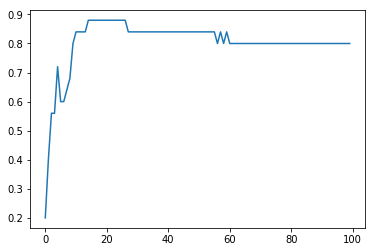

In [476]:
## Plotting the accuracy with iterations (Code given)
from matplotlib import pyplot as plt
plt.plot(history.history['val_acc'])


In [477]:
"""Test for model"""


'Test for model'

## Part 3 - NLP


### Character-level Neural Language Model in Keras
A language model that predicts the next word in the sequence based on the specific words that have come before it in the sequence.

### Importing Libraries and Loading data
The nursery rhyme "Sing a Song of Sixpence" is well known in the west.

The first verse is common, but there is also a 4 verse version that we will use to develop our character-based language model.

In [0]:
from numpy import array
from pickle import dump
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

raw_text = """Sing a song of sixpence,
A pocket full of rye.
Four and twenty blackbirds,
Baked in a pie.
 
When the pie was opened
The birds began to sing;
Wasn't that a dainty dish,
To set before the king.
 
The king was in his counting house,
Counting out his money;
The queen was in the parlour,
Eating bread and honey.
 
The maid was in the garden,
Hanging out the clothes,
When down came a blackbird
And pecked off her nose."""

### Question 1
#### Preprocess

In [0]:
length = 10
def preprocess(raw_text,length):
    """
    Input:
        raw_text: a sequence of characters
          length: length of characters in 'sequences'(output) list 
    
    Action:
        
        1. Tokenize the raw_text
        2. Split the string in chunk of 'length' characters. For example, your output should look like sequences = ['Sing a song', 'ing a song ', 'ng a song o', ...]
        
    Output:
        tokens: a list obtained after splitting the raw_text
        sequences: a list obtained after splitting the 'raw_text' string in chunk of ('length') characters
    """
    # YOUR CODE HERE
    tokens=[]
    sequences=[]
    tokens=raw_text.split()
    i=0
    while i<(len(tokens)):
        s=raw_text[i:i+length+1]
        sequences.append(s)
        i+=1
    return sequences, tokens, raw_text
    
    
sequences, tokens, raw_text = preprocess(raw_text,length)

In [480]:
len(sequences)

79

In [481]:
'''test for preprocess'''

'test for preprocess'

### Question 2
####Mapping

In [482]:
'''test for mapp'''


'test for mapp'

In [0]:
def mapp(raw_text):
    """
    Input:
        raw_text: 1d list
    
    Actions: 
        
        IMP: FOLLOW THE ACTIONS GIVEN BELOW IN THE PRESCRIBED SEQUENCES
        
        1. Create a set of raw_text
        2. Convert it into a list
        3. Sort the list and store it into a list (say chars) 
        
        Note: You can use inbuilt functions like set(), sorted(), list(), etc. 
        
        4. Create dictionary (say mapping) where each key is character present in sorted list 'chars' (Hint: use enumerate(chars))
        
    Output:
        mapping: dictionary
    """ 
    # YOUR CODE HERE
    chars={}
    s = list(sorted(set(raw_text)))
    for i in enumerate(s):
      chars[i[0]] = i[1]
    return(chars)
    
mapping = mapp(raw_text)
vocab_size = len(mapping)

### Question 3
####Encode Sequences

In [484]:
def encode(sequences,mapping):
    """
    Input:
        sequences: 1d list
        mapping : dictionary
    
    Action: 
        Encode all the sequences to corroponding dictionary mapping (integers) and store it in the 'sequences_encode' np array
        For E.g: sequences[0] = 'Sing a song'
                 sequences_encode[0] = [11 22 26 20  0 14  0 31 27 26 20]
                 
                 where S=11, i=22, n=26, etc. have been assigned to dictionary 'mapping'
        
        Important: data-type of sequences_encode should be numpy.ndarray.
    
    Output:
        sequences_encode: np 2d array
    """
    # YOUR CODE HERE
    sequences_encode = []
    for i in sequences:
      temp=[]
      for j in i:
        temp.append(list(mapping.keys())[list(mapping.values()).index(j)])
      sequences_encode.append(temp)
    return np.array(sequences_encode)
sequences_encode = encode(sequences,mapping)
print(sequences_encode.shape)

(79, 11)


In [485]:
'''test for encode'''
def test_encode():
  assert sequences_encode.shape == (399,11)
  print('Test passed', '\U0001F44D')
test_encode()

AssertionError: ignored

###Question 4
####Split Input and Output

Now that the sequences have been integer encoded, we can separate the columns into input and output sequences of characters. <br>
First 10 characters will be our input and 11th character will be our output corrosponding to it.

In [0]:
def split(sequences_encode):
    """
    Input:
        sequences_encode: np 2d array
        
    Action: Separate the columns into input and output sequences of characters. 
            First 10 characters will be our input (X) and 11th character will be our output (y) corrosponding to it.
            
    Output:
        X: np 2d array
        Y: np array
    """
    # YOUR CODE HERE
    X = sequences_encode[:,[0,1,2,3,4,5,6,7,8,9]]
    Y = sequences_encode[:,[10]]
    return X,Y
X, y = split(sequences_encode)

In [0]:
'''test for split'''
def test_split():
  assert X.shape == (399,10)
  print('Test passed', '\U0001F44D')
test_split()

# SECTION II - MCQ/Short Answer test

## Part 1- RTRL (Recurrent Neural Network)


Suppose 'y' is a timeseries data (which is obtained from the following linear equation) 

####$y(t+1) = w_0y(t) + w_1y(t-1) + w_2u(t) $<br>

####$w = [w_0, \; w_1, \; w_2]$
####If  $\; w = [1.1, \; -0.3, \;0.5], \; y(t)=2, \; y(t-1) = 0.8 \;$ and $\; u(t) = 1.2$ <br><br>
$\Large \frac{\partial y(t)}{\partial w_0} = 0, \; \; \frac{\partial y(t-1)}{\partial w_0} = 1.5$<br><br>
$\Large \frac{\partial y(t)}{\partial w_1} = 0.7, \; \; \frac{\partial y(t-1)}{\partial w_1} = 0.2$<br><br>
$\Large \frac{\partial y(t)}{\partial w_2} = 1, \; \; \frac{\partial y(t-1)}{\partial w_2} = 0.6$



###Question 1. Which of the following is correct
<br>
$$
a) \frac{\partial y(t+1)}{\partial w_0} = w_0\frac{\partial y(t)}{\partial w_0} + y(t-1) + w_1\frac{\partial y(t-1)}{\partial w_0}
$$
<br>
$$
b) \frac{\partial y(t+1)}{\partial w_0} = w_0\frac{\partial y(t)}{\partial w_0} + y(t) + w_1\frac{\partial y(t-1)}{\partial w_0}
$$
<br>
$$
c) \frac{\partial y(t+1)}{\partial w_0} = w_0\frac{\partial y(t)}{\partial w_0} + w_oy(t) + w_1\frac{\partial y(t-1)}{\partial w_0}
$$
<br>
$$
d) \frac{\partial y(t+1)}{\partial w_0} = w_0\frac{\partial y(t)}{\partial w_0} + u(t) + w_1\frac{\partial y(t-1)}{\partial w_0}
$$
<br>
###Note: 
Write<br>
ans1a='a' in the code cell provided below (if answer is 'a')<br>
else ans1a='b' (if answer is 'b')<br>
else ans1a='c' (if answer is 'c')<br>
else ans1a='d' (if answer is 'd')<br>

In [0]:
ans1a = 'b'

In [0]:
'''test for 1a'''
def test_1a():
  test_1a()

###Question 2. Which of the following is correct

$$a) \; \large \frac{\partial y(t+1)}{\partial w_2} = 1.52$$<br>
$$b) \; \large \frac{\partial y(t+1)}{\partial w_2} = 2.62$$<br>
$$c) \; \large \frac{\partial y(t+1)}{\partial w_2} = 4.32$$<br>
$$d) \; \large \frac{\partial y(t+1)}{\partial w_2} = 2.12$$<br>

###Note: 
Write<br>
ans1b='a' in the code cell provided below (if answer is 'a')<br>
else ans1b='b' (if answer is 'b')<br>
else ans1b='c' (if answer is 'c')<br>
else ans1b='d' (if answer is 'd')<br>

In [0]:
ans1b = 'd'

In [0]:
'''test for 1b'''
def test_1b():
  test_1b()

###Question 3. Which of the following is correct

$$a) \; \large \frac{\partial y(t+1)}{\partial w_1} = 1.52$$<br>
$$b) \; \large \frac{\partial y(t+1)}{\partial w_1} = 1.51$$<br>
$$c) \; \large \frac{\partial y(t+1)}{\partial w_1} = 2.32$$<br>
$$d) \; \large \frac{\partial y(t+1)}{\partial w_1} = 2.12$$<br>

###Note: 
Write<br>
ans1c='a' in the code cell provided below (if answer is 'a')<br>
else ans1c='b' (if answer is 'b')<br>
else ans1c='c' (if answer is 'c')<br>
else ans1c='d' (if answer is 'd')<br>

In [0]:
ans1c = 'b'

In [0]:
'''test for 1c'''
def test_1c():
  test_1c()

###Question 4. Which of the following is correct

$$a) \; \large \frac{\partial y(t+1)}{\partial w_0} = 1.55$$<br>
$$b) \; \large \frac{\partial y(t+1)}{\partial w_0} = 1.5$$<br>
$$c) \; \large \frac{\partial y(t+1)}{\partial w_0} = 2.35$$<br>
$$d) \; \large \frac{\partial y(t+1)}{\partial w_0} = 1.125$$<br>

###Note: 
Write<br>
ans1d='a' in the code cell provided below (if answer is 'a')<br>
else ans1d='b' (if answer is 'b')<br>
else ans1d='c' (if answer is 'c')<br>
else ans1d='d' (if answer is 'd')<br>

In [0]:
ans1d = 'a'

In [0]:
'''test for 1d'''
def test_1d():
  test_1d()

###Question 5. Which of the following is correct weight update formula

###given $\; E = \frac{1}{2}(y_d - y)^2$ <br>




$$a) \; \large w_{new} = w_{old} - \eta(y_d - y)\cdot \frac{\partial y(t)}{\partial w} $$<br>
$$b) \; \large w_{new} = w_{old} + \eta(y_d - y)\cdot \frac{\partial y(t+1)}{\partial w} $$<br>
$$c) \; \large w_{new} = w_{old} - \eta(y_d - y)\cdot \frac{\partial y(t+1)}{\partial w} $$<br>
$$d) \; \large w_{new} = w_{old} + \eta(y_d - y)\cdot \frac{\partial y(t)}{\partial w} $$<br>

###Note: 
Write<br>
ans1e='a' in the code cell provided below (if answer is 'a')<br>
else ans1e='b' (if answer is 'b')<br>
else ans1e='c' (if answer is 'c')<br>
else ans1e='d' (if answer is 'd')<br>

In [0]:
ans1e = 'b'

In [0]:
'''test for 1e'''
def test_1e(d):
  test_1e()

###Question 6. If  $\; \eta = 1, \; y_d = 2.66\; and\; w_{old}=[1.1,\; -0.3,\; 0.5].\; $ Then, which of the following is correct <br><br>

$$a) \; \large w_{new} = [0.915, \; -0.461,\; 0.188]$$<br>
$$b) \; \large w_{new} = [0.965, \; -0.481,\; 0.388]$$<br>
$$c) \; \large w_{new} = [0.925, \; -0.411,\; 0.488]$$<br>
$$d) \; \large w_{new} = [0.945, \; -0.451,\; 0.288]$$<br>

###Note: 
Write<br>
ans1f='a' in the code cell provided below (if answer is 'a')<br>
else ans1f='b' (if answer is 'b')<br>
else ans1f='c' (if answer is 'c')<br>
else ans1f='d' (if answer is 'd')<br>

In [0]:
ans1f = 'd'

In [0]:
'''test for 1f'''
def test_1f():
  test_1f()

## Part 2 - CNN (Convolutional Neural Network)

### Question 1
In the following figure,what is the total number of tunable parameters including the biases?

<img src="https://drive.google.com/uc?id=1yqMW2TSlME3YrjlspOUbVxnayHws3-3v" title="" align="center" width="50%" height="100%"/> <br>


In [0]:
# type the value of the total number of parameters
Num_Param = 76

In [0]:
'''test for Num_of_Param '''

### Question 2

The CNN used to solve MNIST hand written digit identification problem has following
architecture:
*   Input has the dimension 27x27x1 .
*   The first layer uses 25 filters of kernel size 5x5. The convolution takes place with stride = 1, Padding is zero and activation is ReLU
*   The second layer employs 30 filters of kernel size of 7x7, with stride = 2, padding is zero and activation is ReLU
*   The output layer is a simple classifier (fully connected) that actuates the actual digit in terms of one-hot coding.
####Find the dimension of the response in the first layer


In [0]:
# Fill the dimensions below
dim_first = [23 ,23 ,2 ]

In [0]:
'''test for dim_first'''

###Question 3
In Question 2 above, Find the dimension of the response in the second layer.

In [0]:
# Fill the dimensions below
dim_second = [19 , 19, 4]

In [0]:
'''test for dim_second'''

###Question 4 
Find the number of parameters that will be estimated using gradient descent algorithm (including the biases)

In [0]:
#Provide the value of num_grad
num_grad = 76


In [0]:
'''test'''

## Part 3 - Keras Model Building

### Question 1
In the following python code using a sequential model from keras library  <br>


model.add(Dense(10, input_dim= 100, activation='relu')) <br>
model.add(Dense(8, activation='relu')) <br>
model.add(Dense(5, activation='relu')) <br>
model.add(Dense(5, activation='softmax')) <br>

#### What is the total number of weights to be trained (including the biases)? <br> 


In [0]:
Num_of_Param = 2000

In [0]:
'''test for Num_of_Param '''